In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bnlearn as bn

In [3]:
df = pd.read_excel('exoplanets.xls')

In [4]:
df.head()

,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
0,11473000.0,3.478097e+25,1.80,YES,YES,35.8,YES,50.5,NO
1,10440000.0,2.620465e+25,1.64,NO,NO,34.5,NO,30.5,NO
2,12520000.0,4.518792e+25,1.96,YES,YES,42.1,YES,12.3,YES
3,11727000.0,3.714528e+25,1.84,YES,YES,39.0,NO,24.5,NO
4,7285000.0,8.903243e+24,1.14,NO,NO,9.3,NO,32.7,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   radius (m)             10000 non-null  float64
 1   mass (kg)              10000 non-null  float64
 2   gravity                10000 non-null  float64
 3   atmosphere             10000 non-null  object 
 4   oxygene                10000 non-null  object 
 5   avg_temp (C)           10000 non-null  float64
 6   water                  10000 non-null  object 
 7   rotational_period (h)  10000 non-null  float64
 8   life                   10000 non-null  object 
dtypes: float64(5), object(4)
memory usage: 703.2+ KB


1. Categoriza las variables reales como consideres.

In [6]:
def categorize_variable(dataframe: pd.DataFrame, variable: str, labels: list) -> None:
    dataframe[variable] = pd.qcut(x=dataframe[variable], q=3, labels=labels)
    return None

In [7]:
categorize_variable(df, 'radius (m)', ["Small", "Medium", "Big"])
categorize_variable(df, 'mass (kg)', ["Light", "Medium", "Heavy"])
categorize_variable(df, 'gravity', ["Weak", "Medium", "Strong"])
categorize_variable(df, 'avg_temp (C)', ["Cold", "Tempered", "Warm"])
categorize_variable(df, 'rotational_period (h)', ["Slow", "Normal", "Fast"])

2. Mediante la librería bnlearn obtén el grafo de manera automática de la red bayesiana y reflexiona sobre su verosimilitud. Cámbialo manualmente si lo crees conveniente.

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

     radius (m) mass (kg) gravity atmosphere oxygene avg_temp (C) water  \
0           Big     Heavy  Strong        YES     YES         Cold   YES   
1           Big     Heavy  Strong         NO      NO         Cold    NO   
2           Big     Heavy  Strong        YES     YES     Tempered   YES   
3           Big     Heavy  Strong        YES     YES     Tempered    NO   
4         Small     Light    Weak         NO      NO         Cold    NO   
5        Medium    Medium  Medium         NO      NO         Warm    NO   
6        Medium    Medium  Medium         NO      NO     Tempered    NO   
7         Small     Light    Weak        YES     YES         Cold    NO   
8           Big     Heavy  Strong        YES     YES         Warm    NO   
9         Small     Light    Weak         NO      NO         Warm    NO   
10          Big     Heavy  Strong        YES     YES     Tempered    NO   
11        Small     Light    Weak         NO      NO         Warm    NO   
12          Big     Heavy

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'radius (m)': array([-0.09271154,  0.59277579]),
  'mass (kg)': array([0.14841832, 0.563833  ]),
  'gravity': array([-0.01073581,  0.53127601]),
  'atmosphere': array([0.12771249, 0.19127177]),
  'oxygene': array([ 0.50370967, -0.0331223 ]),
  'avg_temp (C)': array([-0.9508735 , -0.86638526]),
  'water': array([ 0.12834912, -0.01790468]),
  'rotational_period (h)': array([-0.1390677, -1.       ]),
  'life': array([0.28519895, 0.03825567])},
 'G': <networkx.classes.digraph.DiGraph at 0x25c9b18dfa0>,
 'node_properties': {'radius (m)': {'node_color': '#1f456e', 'node_size': 800},
  'mass (kg)': {'node_color': '#1f456e', 'node_size': 800},
  'gravity': {'node_color': '#1f456e', 'node_size': 800},
  'atmosphere': {'node_color': '#1f456e', 'node_size': 800},
  'oxygene': {'node_color': '#1f456e', 'node_size': 800},
  'avg_temp (C)': {'node_color': '#1f456e', 'node_size': 800},
  'water': {'node_color': '#1f456e', 'node_size': 800},
  'rota

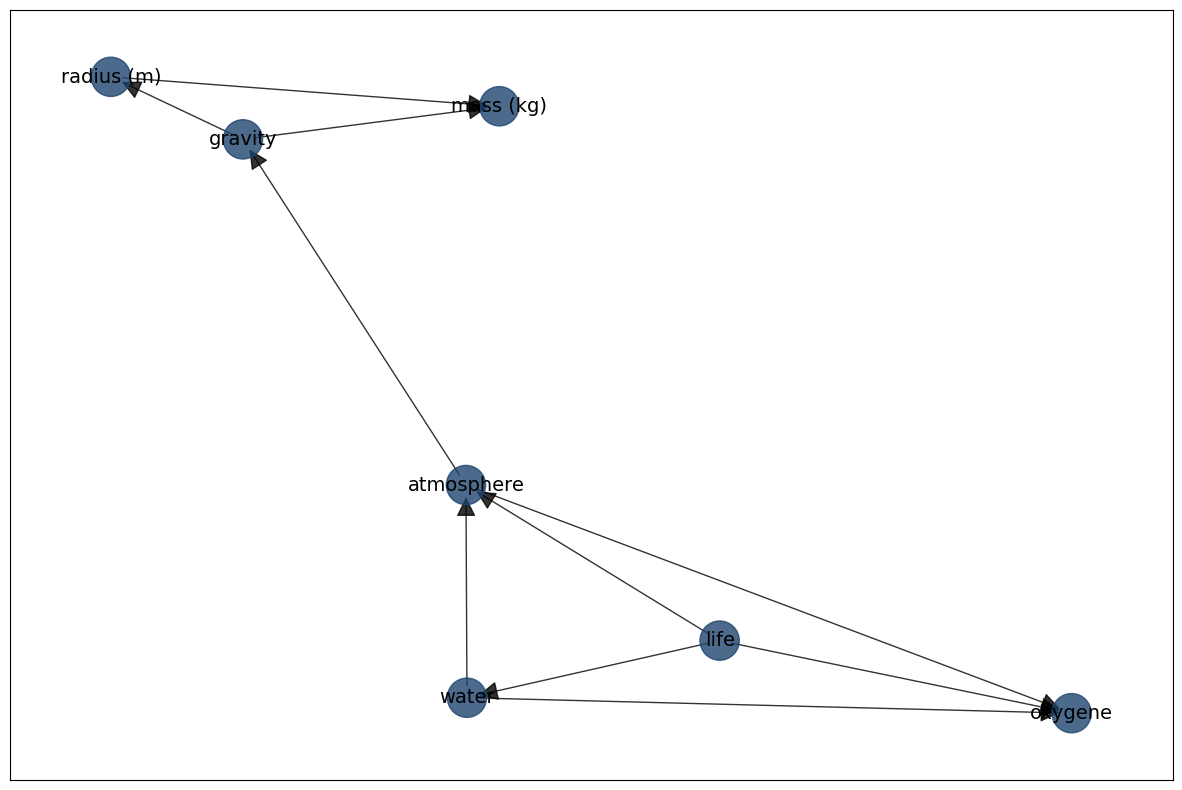

In [9]:
DAG = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')
bn.plot(DAG)

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'radius (m)': array([-0.9800726 ,  0.64862812]),
  'mass (kg)': array([-0.86928542,  0.19935589]),
  'gravity': array([-0.31347091,  0.3280891 ]),
  'atmosphere': array([-0.15481668, -0.14428123]),
  'oxygene': array([0.65062223, 0.10090963]),
  'water': array([ 0.66702338, -0.80106311]),
  'life': array([ 1.       , -0.3316384])},
 'G': <networkx.classes.digraph.DiGraph at 0x25c9c035af0>,
 'node_properties': {'radius (m)': {'node_color': '#1f456e', 'node_size': 800},
  'mass (kg)': {'node_color': '#1f456e', 'node_size': 800},
  'gravity': {'node_color': '#1f456e', 'node_size': 800},
  'atmosphere': {'node_color': '#1f456e', 'node_size': 800},
  'oxygene': {'node_color': '#1f456e', 'node_size': 800},
  'water': {'node_color': '#1f456e', 'node_size': 800},
  'life': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('radius (m)', 'mass (kg)'): {'color': '#000000',
   'weight': 1},
  ('radius (m)', 'gravity'): {'color'

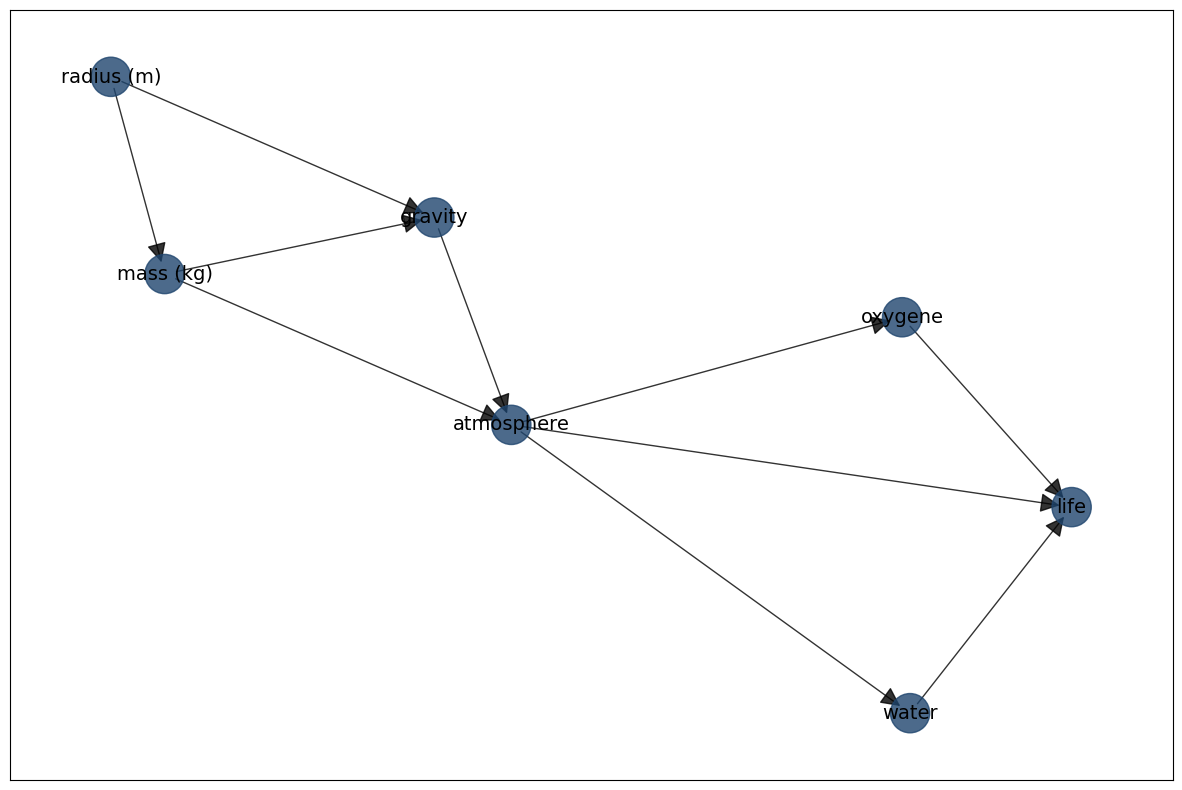

In [10]:
model_edges = [
    ('radius (m)', 'mass (kg)'), # La masa depende de la cantidad de materia en el objeto y su tamaño
    ('mass (kg)', 'gravity'), # La gravedad depende de la cantidad de materia en el objeto
    ('radius (m)', 'gravity'), # La gravedad también depende del tamaño del objeto
    ('mass (kg)', 'atmosphere'), # La masa puede afectar la capacidad del objeto para retener una atmósfera.
    ('gravity', 'atmosphere'), # La gravedad puede afectar la capacidad del objeto para retener una atmósfera.
    ('atmosphere', 'oxygene'), # La presencia de una atmósfera adecuada es un factor importante para la existencia de oxígeno respirable
    ('atmosphere', 'water'), # La presencia de una atmósfera adecuada es un factor importante para la existencia de agua líquida
    ('atmosphere', 'life'),  # La atmósfera es un factor esencial para la vida
    ('oxygene', 'life'), # El oxígeno es un factor esencial para la vida
    ('water', 'life') # El agua es un factor esencial para la vida
]

DAG_life = bn.make_DAG(model_edges)

bn.plot(DAG_life, interactive=False)

3. Busca de manera automática las tablas de probabilidad condicionada de la red.

In [11]:
model = bn.parameter_learning.fit(DAG, df)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of radius (m):
+--------------------+-----+---------------------+
| gravity            | ... | gravity(Weak)       |
+--------------------+-----+---------------------+
| radius (m)(Big)    | ... | 0.03009238361770636 |
+--------------------+-----+---------------------+
| radius (m)(Medium) | ... | 0.03686316993169029 |
+--------------------+-----+---------------------+
| radius (m)(Small)  | ... | 0.9330444464506034  |
+--------------------+-----+---------------------+
[bnlearn] >CPD of mass (kg):
+-------------------+-----+----------------------+
| gravity           | ... | gravity(Weak)        |
+-------------------+-----+----------------------+
| radius (m)        | ... | radius (m)(Small)    |
+-------------------+-----+----------------------+
| mass (kg)(Heavy)  | ... | 0.010

In [12]:
bn.print_CPD(model)

[bnlearn] >Data is stored in [query.df]
+----+--------------+-----------+-----------+
|    |   radius (m) |   gravity |         p |
+====+==============+===========+===========+
|  0 |            0 |         0 | 0.0371246 |
+----+--------------+-----------+-----------+
|  1 |            0 |         1 | 0.938972  |
+----+--------------+-----------+-----------+
|  2 |            0 |         2 | 0.0300924 |
+----+--------------+-----------+-----------+
|  3 |            1 |         0 | 0.93257   |
+----+--------------+-----------+-----------+
|  4 |            1 |         1 | 0.0305139 |
+----+--------------+-----------+-----------+
|  5 |            1 |         2 | 0.0368632 |
+----+--------------+-----------+-----------+
|  6 |            2 |         0 | 0.0303058 |
+----+--------------+-----------+-----------+
|  7 |            2 |         1 | 0.0305139 |
+----+--------------+-----------+-----------+
|  8 |            2 |         2 | 0.933044  |
+----+--------------+-----------+-------

{'radius (m)':    radius (m)  gravity         p
 0           0        0  0.037125
 1           0        1  0.938972
 2           0        2  0.030092
 3           1        0  0.932570
 4           1        1  0.030514
 5           1        2  0.036863
 6           2        0  0.030306
 7           2        1  0.030514
 8           2        2  0.933044,
 'mass (kg)':     mass (kg)  gravity  radius (m)         p
 0           0        0           0  0.455782
 1           0        0           1  0.010832
 2           0        0           2  0.333333
 3           0        1           0  0.978335
 4           0        1           1  0.333333
 5           0        1           2  0.333333
 6           0        2           0  0.333333
 7           0        2           1  0.272109
 8           0        2           2  0.010751
 9           1        0           0  0.272109
 10          1        0           1  0.010832
 11          1        0           2  0.333333
 12          1        1           

4. Escoge algunas propiedades de los planetas y realiza la inferencia sobre ellos.

In [13]:
q1 = bn.inference.fit(model, variables=['life'], evidence={'water': 'YES', 'atmosphere': 'YES'})
print(q1.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+----------+
|    |   life |        p |
+====+========+==========+
|  0 |      0 | 0.282665 |
+----+--------+----------+
|  1 |      1 | 0.717335 |
+----+--------+----------+
   life         p
0     0  0.282665
1     1  0.717335


In [15]:
q2 = bn.inference.fit(model, variables=['life'], evidence={'water': 'NO', 'atmosphere': 'NO', 'oxygene': 'NO'})
print(q2.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+-----------+
|    |   life |         p |
+====+========+===========+
|  0 |      0 | 0.976675  |
+----+--------+-----------+
|  1 |      1 | 0.0233249 |
+----+--------+-----------+
   life         p
0     0  0.976675
1     1  0.023325


In [16]:
q3 = bn.inference.fit(model, variables=['life'], evidence={'mass (kg)': 'Light', 'radius (m)': 'Small'})
print(q3.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+----------+
|    |   life |        p |
+====+========+==========+
|  0 |      0 | 0.864862 |
+----+--------+----------+
|  1 |      1 | 0.135138 |
+----+--------+----------+
   life         p
0     0  0.864862
1     1  0.135138


In [18]:
q4 = bn.inference.fit(model, variables=['life'], evidence={'mass (kg)': 'Heavy', 'radius (m)': 'Big'})
print(q4.df)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+----------+
|    |   life |        p |
+====+========+==========+
|  0 |      0 | 0.799765 |
+----+--------+----------+
|  1 |      1 | 0.200235 |
+----+--------+----------+
   life         p
0     0  0.799765
1     1  0.200235
